In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

Generate a Signal

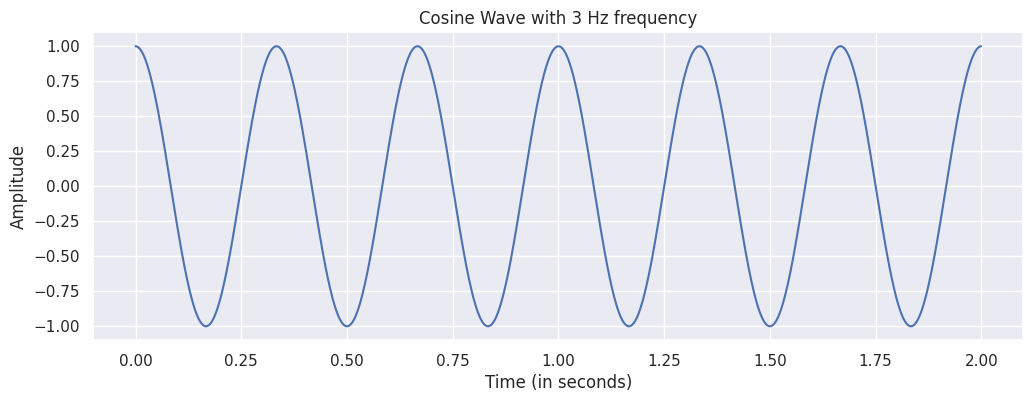

In [11]:
f = 3.0
t = np.arange(0,2,0.001) 

cos_wave = np.cos(2*np.pi*f*t)
# cos_wave = 2*m.cos(2*np.pi*f*t) + 5*m.cos(2*np.pi*f*2*t)

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(t,cos_wave)
plt.title("Cosine Wave with 3 Hz frequency")
plt.ylabel("Amplitude")
plt.xlabel('Time (in seconds)');

In [12]:
r_cord = []
min_freq_range = 0.0
max_freq_range = 10.0
sf_list = np.arange(min_freq_range, max_freq_range, 0.1)
for sf in sf_list:
    r_cord.append( [(cos_wave[i], t[i]*sf*2*np.pi) for i in range(len(t)) ] )

In [13]:
x_cord , y_cord = [], []
for l in range(len(r_cord)):
    x_cord.append( [amp*np.cos(theta) for (amp,theta) in r_cord[l]] )
    y_cord.append( [amp*np.sin(theta) for (amp,theta) in r_cord[l]] )

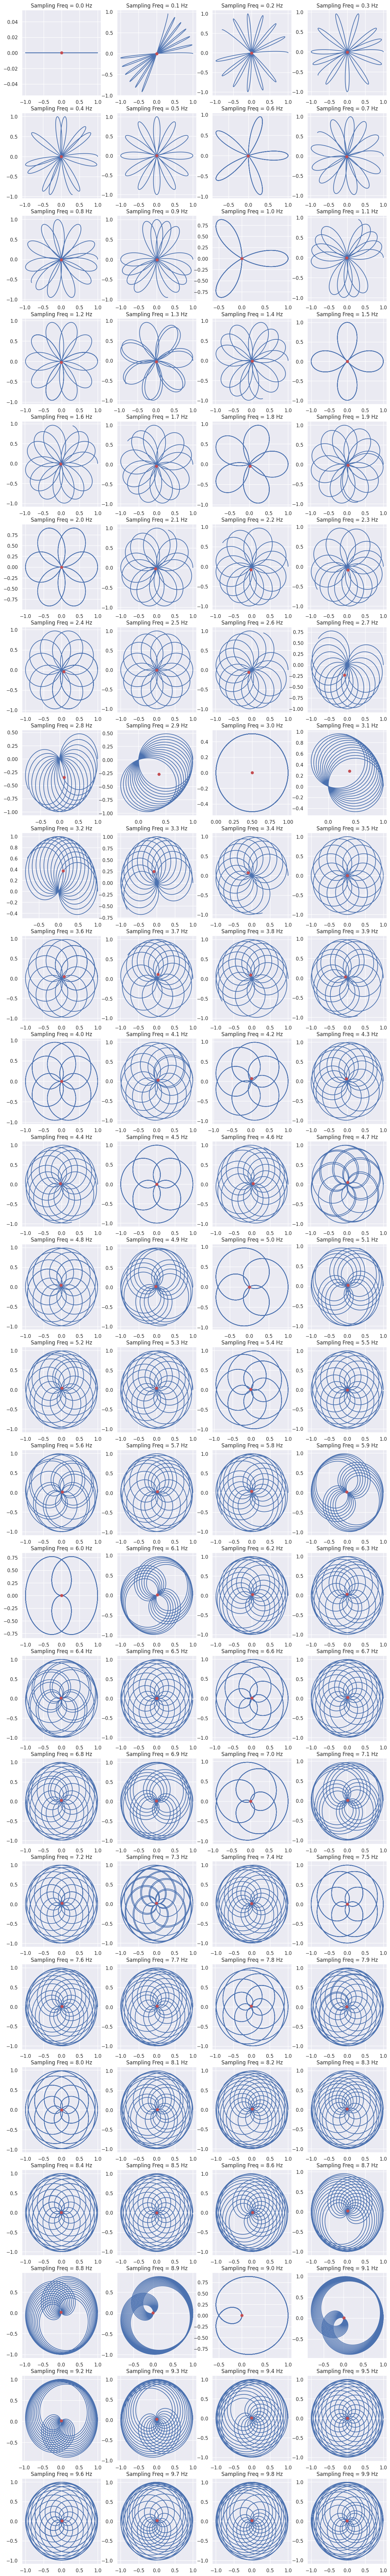

In [14]:
mean_list = []

plt.rcParams["figure.figsize"] = (15,110)
for l in range(len(r_cord)):
    plt.subplot(int(len(r_cord)/4)+1, 4, int(l+1))
    plt.plot(x_cord[l], y_cord[l])
    plt.plot(np.mean(x_cord[l]), np.mean(y_cord[l]), 'or' )
    plt.title("Sampling Freq = "+str(round(sf_list[l], 2))+" Hz")
    
    # Storing the COM for plotting later
    x_mean = np.sum(x_cord[l])
    mean_list.append(x_mean)

Notice how the Center of Mass(Red Dot) moves and what happens when it reaches a frequency of 9.0 Hz !!!

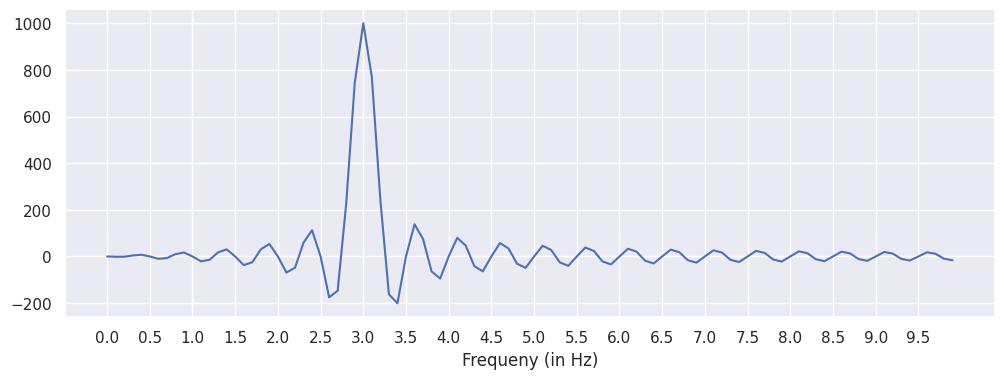

In [15]:
plt.rcParams["figure.figsize"] = (12,4)
plt.xlabel("Frequeny (in Hz)")
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5))
sns.set()
plt.plot(sf_list,mean_list);

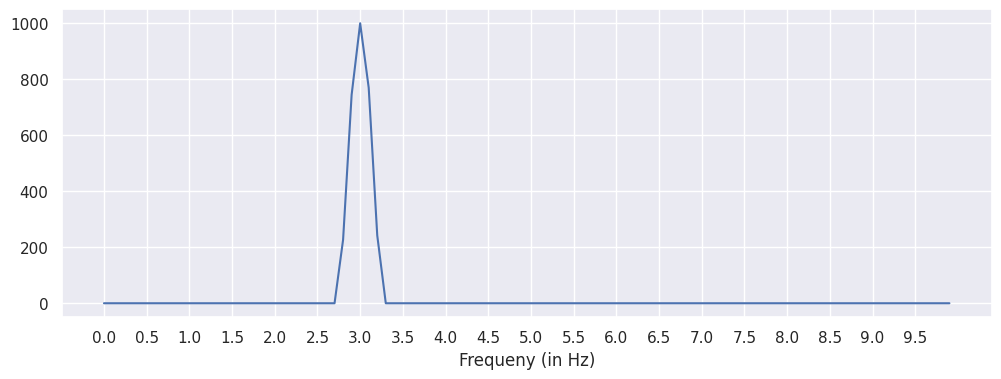

In [16]:
plt.rcParams["figure.figsize"] = (12,4)
smoothed = [i if i>0 and i>0.2*max(mean_list) else 0 for i in mean_list]
plt.plot(sf_list, smoothed)
plt.xlabel("Frequeny (in Hz)")
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5));

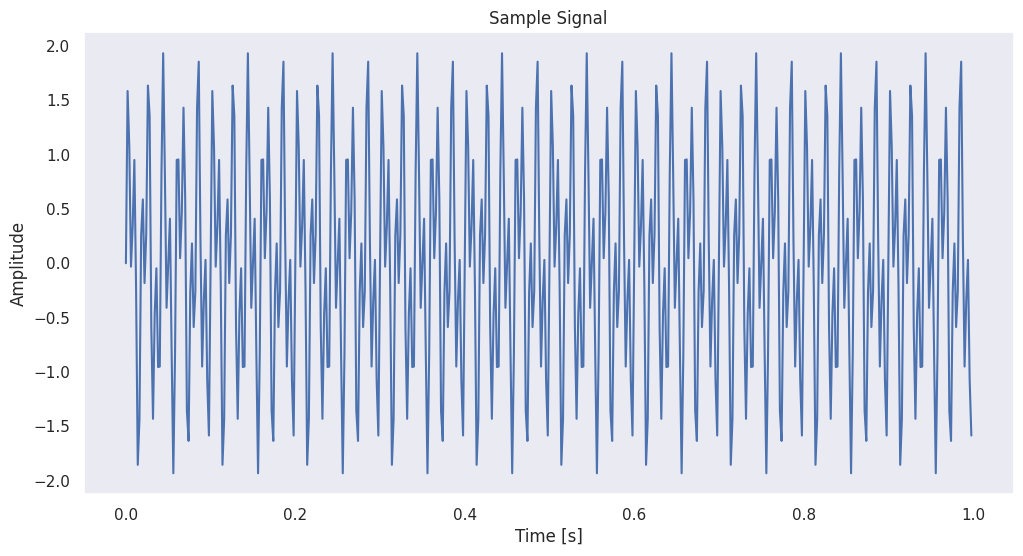

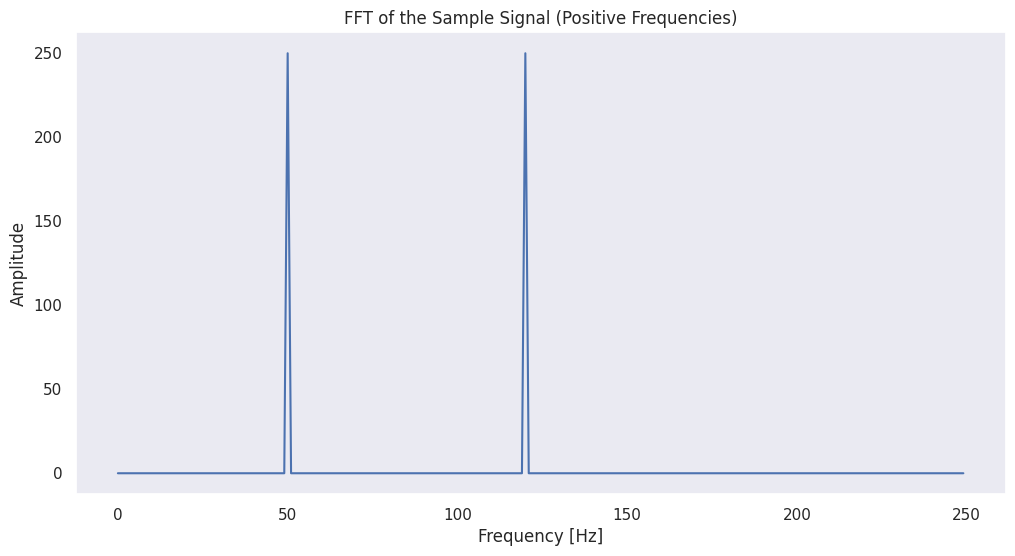

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sample rate and duration
fs = 500  # Sample rate in Hz
t = 1  # Duration in seconds

# Time vector
x = np.linspace(0, t, fs * t, endpoint=False)

# Create a signal with two frequencies
frequencies = [50, 120]  # Frequencies in Hz
signal = np.sin(2 * np.pi * frequencies[0] * x) + np.sin(2 * np.pi * frequencies[1] * x)

# Plot the sample signal
plt.figure(figsize=(12, 6))
plt.plot(x, signal)
plt.title('Sample Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Compute the FFT
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(signal), 1/fs)

# Only plot the positive frequencies
positive_freqs = fft_freq[:len(fft_freq)//2]
positive_fft_result = np.abs(fft_result[:len(fft_result)//2])

plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_fft_result)
plt.title('FFT of the Sample Signal (Positive Frequencies)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Create sliders for frequencies
freq1_slider = widgets.FloatSlider(value=50, min=1, max=200, step=1, description='Freq 1 (Hz)')
freq2_slider = widgets.FloatSlider(value=120, min=1, max=200, step=1, description='Freq 2 (Hz)')

def update_plot(freq1, freq2):
    # Sample rate and duration
    fs = 500  # Sample rate in Hz
    t = 1  # Duration in seconds

    # Time vector
    x = np.linspace(0, t, fs * t, endpoint=False)

    # Create a signal with two frequencies
    signal = np.sin(2 * np.pi * freq1 * x) + np.sin(2 * np.pi * freq2 * x)

    # Plot the sample signal
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(x, signal)
    plt.title('Sample Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()

    # Compute the FFT
    fft_result = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(len(signal), 1/fs)

    # Only plot the positive frequencies
    positive_freqs = fft_freq[:len(fft_freq)//2]
    positive_fft_result = np.abs(fft_result[:len(fft_result)//2])

    plt.subplot(2, 1, 2)
    plt.plot(positive_freqs, positive_fft_result)
    plt.title('FFT of the Sample Signal (Positive Frequencies)')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid()

    plt.tight_layout()
    plt.show()

# Link the update function to the sliders and display the interactive plot
interactive_plot = widgets.interactive(update_plot, freq1=freq1_slider, freq2=freq2_slider)
display(interactive_plot)

interactive(children=(FloatSlider(value=50.0, description='Freq 1 (Hz)', max=200.0, min=1.0, step=1.0), FloatS…

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Create sliders for signal frequencies
freq_sliders = [widgets.FloatSlider(value=f, min=1, max=200, step=1, description=f'Freq {i+1} (Hz)') for i, f in enumerate([10, 20, 30, 40, 50, 60])]

def update_plot(f1, f2, f3, f4, f5, f6):
    fs = 500  # Sample rate in Hz
    t = 1  # Duration in seconds
    x = np.linspace(0, t, fs * t, endpoint=False)

    # Create signals
    signals = [np.sin(2 * np.pi * f * x) for f in [f1, f2, f3, f4, f5, f6]]
    combined_signal = sum(signals)

    # Compute FFT
    fft_result = np.fft.fft(combined_signal)
    fft_freq = np.fft.fftfreq(len(combined_signal), 1/fs)
    positive_freqs = fft_freq[:len(fft_freq)//2]
    positive_fft_result = np.abs(fft_result[:len(fft_result)//2])

    # Compute center of mass
    fft_result_complex = fft_result[:len(fft_result)//2]
    center_of_mass = np.sum(positive_freqs * positive_fft_result) / np.sum(positive_fft_result)
    angle = np.angle(np.sum(fft_result_complex))

    # Plot combined signal
    plt.figure(figsize=(14, 10))
    plt.subplot(3, 1, 1)
    plt.plot(x, combined_signal, label='Combined Signal')
    for i, sig in enumerate(signals):
        plt.plot(x, sig, linestyle='--', alpha=0.7, label=f'Signal {i+1}')
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Combined Signal and Individual Components')
    plt.grid()

    # Plot FFT
    plt.subplot(3, 1, 2)
    plt.plot(positive_freqs, positive_fft_result)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.title('FFT of Combined Signal')
    plt.grid()

    # Plot center of mass
    plt.subplot(3, 1, 3)
    circle = plt.Circle((0, 0), 1, color='lightgray', fill=False)
    plt.gca().add_artist(circle)
    plt.plot([0, np.cos(angle)], [0, np.sin(angle)], marker='o')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Center of Mass on Unit Circle')
    plt.grid()

    plt.tight_layout()
    plt.show()

# Ensure the keys match the argument names expected by update_plot
freq_sliders_dict = {f'f{i+1}': freq_sliders[i] for i in range(6)}
interactive_plot = widgets.interactive(update_plot, **freq_sliders_dict)
display(interactive_plot)

interactive(children=(FloatSlider(value=10.0, description='Freq 1 (Hz)', max=200.0, min=1.0, step=1.0), FloatS…

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

sns.set()

# Create sliders for the cosine wave frequency and the sampling frequency range with finer steps
freq_slider = widgets.FloatSlider(value=3.0, min=0.1, max=10.0, step=0.01, description='Cosine Freq')
min_freq_slider = widgets.FloatSlider(value=0.0, min=0.0, max=9.99, step=0.01, description='Min Freq')
max_freq_slider = widgets.FloatSlider(value=3.0, min=0.1, max=10.0, step=0.01, description='Max Freq')

def update_plot(freq, min_freq, max_freq):
    if min_freq >= max_freq:
        min_freq = max_freq - 0.01
        min_freq_slider.value = min_freq

    t = np.arange(0, 2, 0.001)
    cos_wave = np.cos(2 * np.pi * freq * t)

    fig, ax = plt.subplots(2, 1, figsize=(12, 8))

    # Plot the cosine wave
    ax[0].clear()
    ax[0].plot(t, cos_wave, label='Cosine Wave')
    ax[0].set_title(f"Cosine Wave with {freq} Hz frequency")
    ax[0].set_ylabel("Amplitude")
    ax[0].set_xlabel('Time (in seconds)')

    r_cord = []
    sf_list = np.arange(min_freq, max_freq, 0.01)
    for sf in sf_list:
        r_cord.append([(cos_wave[i], t[i] * sf * 2 * np.pi) for i in range(len(t))])

    x_cord, y_cord = [], []
    for l in range(len(r_cord)):
        x_cord.append([amp * np.cos(theta) for (amp, theta) in r_cord[l]])
        y_cord.append([amp * np.sin(theta) for (amp, theta) in r_cord[l]])

    wavelength = 1 / freq
    mask = t < wavelength

    # Calculate and plot center of mass on the cosine wave plot
    center_of_mass_x = np.mean(np.array(x_cord[-1])[mask])
    center_of_mass_y = np.mean(np.array(y_cord[-1])[mask])
    ax[0].scatter(t[mask][0], cos_wave[mask][0], color='blue', zorder=5, label='Center')
    ax[0].scatter(center_of_mass_x, center_of_mass_y, color='red', zorder=5, label='Center of Mass')
    ax[0].legend()

    # Clear previous plot and plot sampled signal
    ax[1].clear()
    ax[1].plot([0], [0], 'or', label='Center')
    for l in range(len(r_cord)):
        ax[1].plot(np.array(x_cord[l])[mask], np.array(y_cord[l])[mask])
    ax[1].scatter(center_of_mass_x, center_of_mass_y, color='blue', zorder=5, label='Center')
    ax[1].scatter(center_of_mass_x, center_of_mass_y, color='red', zorder=5, label='Center of Mass')
    ax[1].set_title("Sampled Signal and Center of Mass (1 Wavelength)")
    ax[1].set_xlabel('X')
    ax[1].set_ylabel('Y')
    ax[1].legend()
    ax[1].grid()

    plt.tight_layout()
    plt.show()

# Link the maximum frequency slider to the generated cosine wave frequency
def on_freq_change(change):
    max_freq_slider.max = change['new']
    max_freq_slider.value = change['new']
    if min_freq_slider.value >= change['new']:
        min_freq_slider.value = change['new'] - 0.01

freq_slider.observe(on_freq_change, names='value')

# Link the update function to the sliders and display the interactive plot
interactive_plot = widgets.interactive(update_plot, freq=freq_slider, min_freq=min_freq_slider, max_freq=max_freq_slider)
display(interactive_plot)

interactive(children=(FloatSlider(value=3.0, description='Cosine Freq', max=10.0, min=0.1, step=0.01), FloatSl…

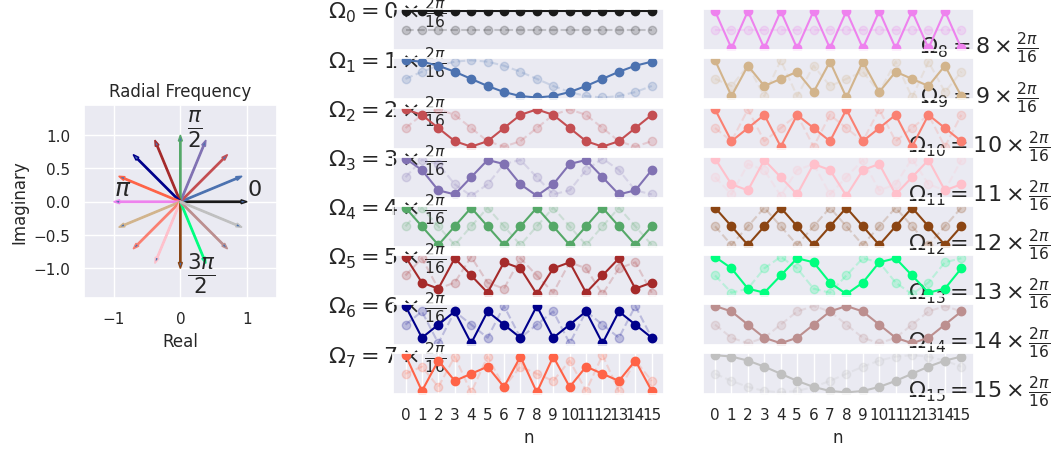

In [19]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
import matplotlib.gridspec as gridspec

def dftmatrix(Nfft=32, N=None):
    'construct DFT matrix'
    k = np.arange(Nfft)
    if N is None:
        N = Nfft
    n = np.arange(N)
    U = np.exp(1j * 2 * np.pi / Nfft * k * n[:, None])  # use numpy broadcasting to create matrix
    return U / np.sqrt(Nfft)

Nfft = 16
v = np.ones((16, 1))
U = dftmatrix(Nfft=Nfft, N=16)

# --- 
# hardcoded constants to format complicated figure

gs = gridspec.GridSpec(8, 12)
gs.update(wspace=1, left=0.01)

fig = plt.figure(figsize=(10, 5))
ax0 = plt.subplot(gs[:, :3])
fig.add_subplot(ax0)

ax0.set_aspect(1)
a = 2 * np.pi / Nfft * np.arange(Nfft)

colors = ['k', 'b', 'r', 'm', 'g', 'Brown', 'DarkBlue', 'Tomato', 'Violet', 'Tan', 'Salmon', 'Pink',
          'SaddleBrown', 'SpringGreen', 'RosyBrown', 'Silver']

for j, i in enumerate(a):
    ax0.add_patch(FancyArrow(0, 0, np.cos(i), np.sin(i), width=0.02,
                             length_includes_head=True, edgecolor=colors[j]))

ax0.text(1, 0.1, '0', fontsize=16)
ax0.text(0.1, 1, r'$\frac{\pi}{2}$', fontsize=22)
ax0.text(-1, 0.1, r'$\pi$', fontsize=18)
ax0.text(0.1, -1.2, r'$\frac{3\pi}{2}$', fontsize=22)
ax0.axis(np.array([-1, 1, -1, 1]) * 1.45)
ax0.set_title('Radial Frequency')
ax0.set_xlabel('Real')
ax0.set_ylabel('Imaginary')

# plots in the middle column
for i in range(8):
    ax = plt.subplot(gs[i, 4:8])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(r'$\Omega_{%d}=%d\times\frac{2\pi}{16}$' % (i, i), fontsize=16,
                  rotation='horizontal')
    ax.plot(U.real[:, i], '-o', color=colors[i])
    ax.plot(U.imag[:, i], '--o', color=colors[i], alpha=0.2)
    ax.axis(ymax=4 / Nfft * 1.1, ymin=-4 / Nfft * 1.1)
ax.set_xticks(np.arange(16))
ax.set_xlabel('n')

# plots in the far right column
for i in range(8):
    ax = plt.subplot(gs[i, 8:])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(r'$\Omega_{%d}=%d\times\frac{2\pi}{16}$' % (i + 8, i + 8), fontsize=16,
                  rotation='horizontal')
    ax.plot(U.real[:, i + 8], '-o', color=colors[i + 8])
    ax.plot(U.imag[:, i + 8], '--o', color=colors[i + 8], alpha=0.2)
    ax.axis(ymax=4 / Nfft * 1.1, ymin=-4 / Nfft * 1.1)
    ax.yaxis.set_label_position('right')
ax.set_xticks(np.arange(16))
ax.set_xlabel('n')

plt.show()

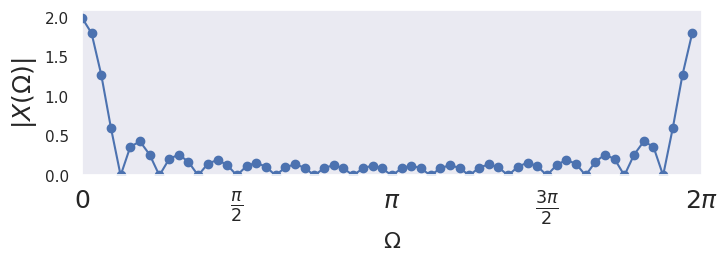

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def dftmatrix(Nfft=32, N=None):
    'construct DFT matrix'
    k = np.arange(Nfft)
    if N is None:
        N = Nfft
    n = np.arange(N)
    U = np.exp(1j * 2 * np.pi / Nfft * k * n[:, None])  # use numpy broadcasting to create matrix
    return U / np.sqrt(Nfft)

# Create DFT matrix
U = dftmatrix(64, 16)

# Create input vector
x = np.ones((16, 1))

# Compute the DFT
X = U.T @ x  # U.T is the conjugate transpose of U

# Plot the magnitude of the DFT
fig, ax = plt.subplots()
fig.set_size_inches((8, 4))
ax.set_aspect(0.8)
ax.grid()
ax.plot(np.arange(0, 64) * 2 * np.pi / 64., np.abs(X), 'o-')
ax.set_ylabel(r'$|X(\Omega)|$', fontsize=18)
ax.set_xticks([0, np.pi / 2., np.pi, 3 * np.pi / 2, 2 * np.pi])
ax.set_xlabel(r'$\Omega$', fontsize=16)
ax.axis([0, 2 * np.pi, 0, 2.1])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=18)

# Save the figure if needed
# fig.savefig('figure_00.png', bbox_inches='tight', dpi=300)

plt.show()

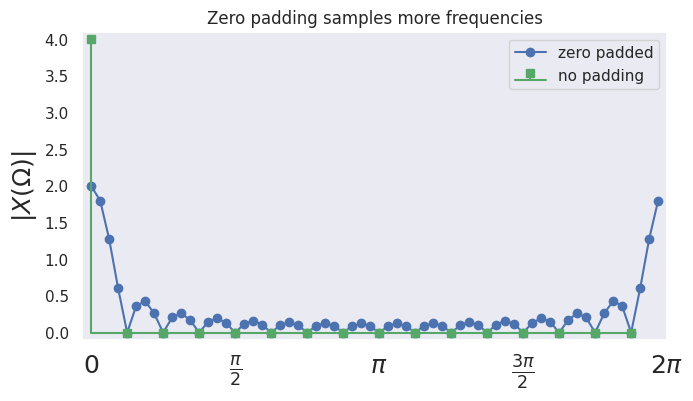

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the DFT matrix construction function
def dftmatrix(Nfft=32, N=None):
    'construct DFT matrix'
    k = np.arange(Nfft)
    if N is None:
        N = Nfft
    n = np.arange(N)
    U = np.exp(1j * 2 * np.pi / Nfft * k * n[:, None])  # use numpy broadcasting to create matrix
    return U / np.sqrt(Nfft)

# Create DFT matrices
U = dftmatrix(64, 16)
U_no_padding = dftmatrix(16)

# Create input vector
x = np.ones((16, 1))

# Compute the DFTs
X = U.T @ x  # U.T is the conjugate transpose of U
X_no_padding = U_no_padding.T @ x  # DFT without zero padding

# Plot the magnitude of the DFTs
fig, ax = plt.subplots()
fig.set_size_inches((8, 4))
ax.set_aspect(0.8)
ax.grid()
ax.plot(np.arange(0, 64) * 2 * np.pi / 64., np.abs(X), 'o-', label='zero padded')
ax.stem(np.arange(0, 16) * 2 * np.pi / 16., np.abs(X_no_padding),
        markerfmt='gs', basefmt='g-', linefmt='g-', label='no padding')
ax.set_ylabel(r'$|X(\Omega)|$', fontsize=18)
ax.set_xticks([0, np.pi / 2., np.pi, 3 * np.pi / 2, 2 * np.pi])
ax.axis([-.1, 2 * np.pi, -.1, 4.1])
ax.legend(loc=0)
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=18)
ax.set_title('Zero padding samples more frequencies')

# Save the figure if needed
# fig.savefig('figure_00.png', bbox_inches='tight', dpi=300)

plt.show()

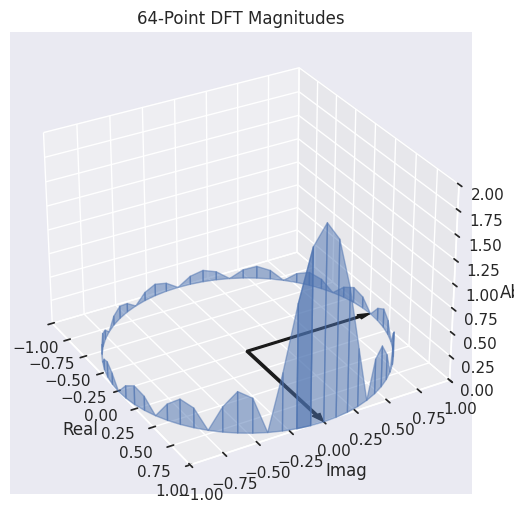

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define constants
N = 64
a = 2 * np.pi / N * np.arange(N)
v = np.ones((16, 1))

# DFT matrix construction function
def dftmatrix(Nfft=32, N=None):
    'construct DFT matrix'
    k = np.arange(Nfft)
    if N is None:
        N = Nfft
    n = np.arange(N)
    U = np.exp(1j * 2 * np.pi / Nfft * k * n[:, None])  # use numpy broadcasting to create matrix
    return U / np.sqrt(Nfft)

# Create DFT matrix and input vector
U = dftmatrix(64, 16)
x = np.ones((16, 1))
X = U.T @ x

# Create data for 3D plot
d = np.vstack([np.cos(a), np.sin(a), np.array(np.abs(X)).flatten()]).T

# Set up the figure and axis
fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, d[:, 2].max()])
ax.set_aspect('auto')
ax.view_init(azim=-30)

ax.set_xlabel('Real')
ax.set_ylabel('Imag')
ax.set_zlabel('Abs')
ax.set_title('64-Point DFT Magnitudes')

# Function to construct 3D facet from adjacent points filled to zero
def facet_filled(x, alpha=0.5, color='b'):
    a, b = x
    a0 = a * np.array([1, 1, 0])
    b0 = b * np.array([1, 1, 0])
    ve = np.vstack([a, a0, b0, b])  # create closed polygon facet
    poly = Poly3DCollection([ve])  # create facet
    poly.set_alpha(alpha)
    poly.set_color(color)
    return poly

# Collect neighboring points and add 3D facets
sl = [slice(i, i + 2) for i in range(d.shape[0] - 1)]  # corrected range to match neighbors
for s in sl:
    poly = facet_filled(d[s, :])
    ax.add_collection3d(poly)

# Edge polygons
ax.add_collection3d(facet_filled(d[[-1, 0], :]))
ax.add_collection3d(facet_filled(d[[-2, -1], :]))

# Add 0 and pi/2 arrows for reference
a = FancyArrow(0, 0, 1, 0, width=0.02, length_includes_head=True, color='k')
b = FancyArrow(0, 0, 0, 1, width=0.02, length_includes_head=True, color='k')
ax.add_patch(a)
ax.add_patch(b)
art3d.patch_2d_to_3d(a, z=0, zdir="z")
art3d.patch_2d_to_3d(b, z=0, zdir="z")

plt.show()

[0.125 0.125]


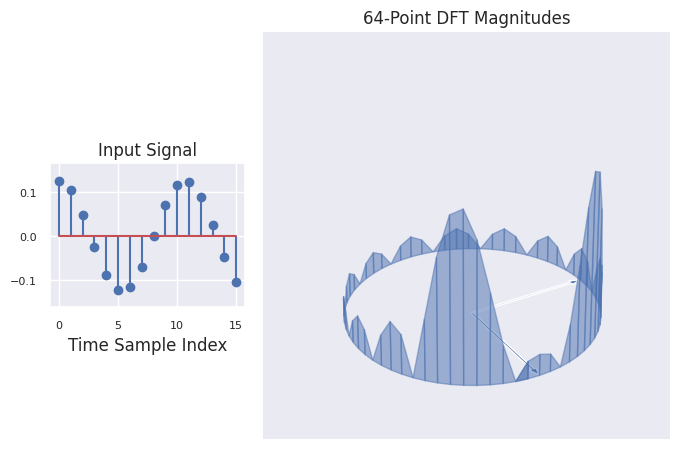

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec

# Define the DFT matrix construction function
def dftmatrix(Nfft=32, N=None):
    'construct DFT matrix'
    k = np.arange(Nfft)
    if N is None:
        N = Nfft
    n = np.arange(N)
    U = np.exp(1j * 2 * np.pi / Nfft * k * n[:, None])  # use numpy broadcasting to create matrix
    return U / np.sqrt(Nfft)

# Function to construct 3D facet from adjacent points filled to zero
def facet_filled(x, alpha=0.5, color='b'):
    a, b = x
    a0 = a * np.array([1, 1, 0])
    b0 = b * np.array([1, 1, 0])
    ve = np.vstack([a, a0, b0, b])  # create closed polygon facet
    poly = Poly3DCollection([ve])  # create facet
    poly.set_alpha(alpha)
    poly.set_color(color)
    return poly

# Function to draw the 3D DFT view
def drawDFTView(X, ax=None, fig=None):
    'Draws 3D diagram given DFT matrix'
    a = 2 * np.pi / len(X) * np.arange(len(X))
    d = np.vstack([np.cos(a), np.sin(a), np.array(np.abs(X)).flatten()]).T
    
    if ax is None and fig is None:
        fig = plt.figure()
        fig.set_size_inches(6, 6)
    if ax is None: # add ax to existing figure
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([0, d[:, 2].max()])
    ax.set_aspect('auto')
    ax.view_init(azim=-30)
    
    ax.set_xlabel('Real')
    ax.set_ylabel('Imag')
    ax.set_zlabel('Abs')
    ax.set_title('64-Point DFT Magnitudes')

    a = FancyArrow(0, 0, 1, 0, width=0.02, length_includes_head=True)
    ax.add_patch(a)
    b = FancyArrow(0, 0, 0, 1, width=0.02, length_includes_head=True)
    ax.add_patch(b)
    art3d.patch_2d_to_3d(a)
    art3d.patch_2d_to_3d(b)
    ax.axis('off')

    sl = [slice(i, i + 2) for i in range(d.shape[0] - 1)]  # corrected range to match neighbors
    for s in sl:
        poly = facet_filled(d[s, :])
        ax.add_collection3d(poly)

    # Edge polygons    
    ax.add_collection3d(facet_filled(d[[-1, 0], :]))
    ax.add_collection3d(facet_filled(d[[-2, -1], :]))

# Function to draw the input and output DFT view
def drawInOut(X, v, return_axes=False):
    fig = plt.figure()
    fig.set_size_inches(8, 8)
    gs = gridspec.GridSpec(8, 6)
        
    ax1 = plt.subplot(gs[3:5, :2])
    ax2 = plt.subplot(gs[:, 2:], projection='3d')
    
    ax1.stem(np.arange(len(v)), v)
    ymin, ymax = ax1.get_ylim()
    ax1.set_ylim(ymin=ymin * 1.2, ymax=ymax * 1.2)
    ax1.set_title('Input Signal')
    ax1.set_xlabel('Time Sample Index')
    ax1.tick_params(labelsize=8)
    
    drawDFTView(X, ax2)
    if return_axes:
        return ax1, ax2

# Example usage
Nfft = 64
N = 16
U = dftmatrix(Nfft, N)
v = U[:, 6].real
ax1, ax2 = drawInOut(U.T @ v, v, return_axes=True)

# Save the figure if needed
# ax1.figure.savefig('figure_00.png', bbox_inches='tight', dpi=300)
print(np.abs(U[:, [6, Nfft - 6]].T @ v)) # real signal has same abs() inner product for conjugate columns

plt.show()

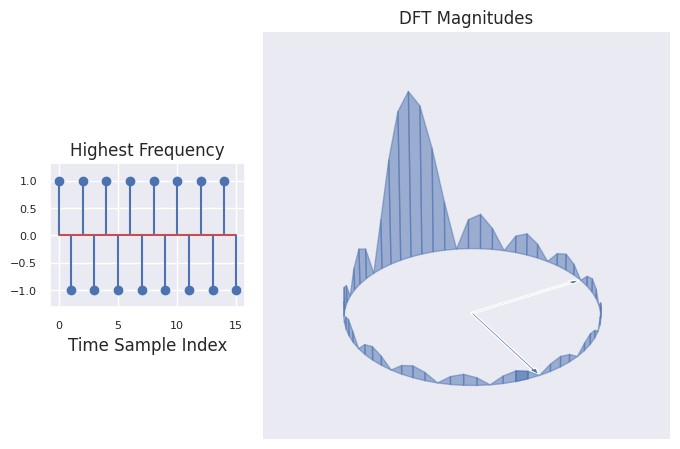

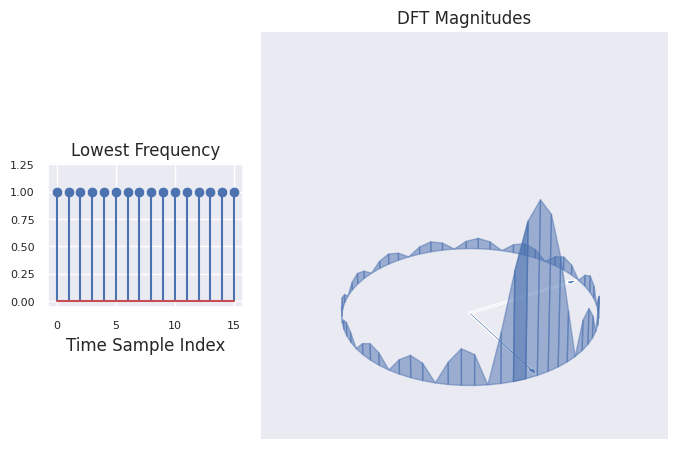

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec

# Define the DFT matrix construction function
def dftmatrix(Nfft=32, N=None):
    'construct DFT matrix'
    k = np.arange(Nfft)
    if N is None:
        N = Nfft
    n = np.arange(N)
    U = np.exp(1j * 2 * np.pi / Nfft * k * n[:, None])  # use numpy broadcasting to create matrix
    return U / np.sqrt(Nfft)

# Function to construct 3D facet from adjacent points filled to zero
def facet_filled(x, alpha=0.5, color='b'):
    a, b = x
    a0 = a * np.array([1, 1, 0])
    b0 = b * np.array([1, 1, 0])
    ve = np.vstack([a, a0, b0, b])  # create closed polygon facet
    poly = Poly3DCollection([ve])  # create facet
    poly.set_alpha(alpha)
    poly.set_color(color)
    return poly

# Function to draw the 3D DFT view
def drawDFTView(X, ax=None, fig=None):
    'Draws 3D diagram given DFT matrix'
    a = 2 * np.pi / len(X) * np.arange(len(X))
    d = np.vstack([np.cos(a), np.sin(a), np.array(np.abs(X)).flatten()]).T
    
    if ax is None and fig is None:
        fig = plt.figure()
        fig.set_size_inches(6, 6)
    if ax is None: # add ax to existing figure
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([0, d[:, 2].max()])
    ax.set_aspect('auto')
    ax.view_init(azim=-30)
    
    ax.set_xlabel('Real')
    ax.set_ylabel('Imag')
    ax.set_zlabel('Abs')
    ax.set_title('DFT Magnitudes')

    a = FancyArrow(0, 0, 1, 0, width=0.02, length_includes_head=True)
    ax.add_patch(a)
    b = FancyArrow(0, 0, 0, 1, width=0.02, length_includes_head=True)
    ax.add_patch(b)
    art3d.patch_2d_to_3d(a)
    art3d.patch_2d_to_3d(b)
    ax.axis('off')

    sl = [slice(i, i + 2) for i in range(d.shape[0] - 1)]  # corrected range to match neighbors
    for s in sl:
        poly = facet_filled(d[s, :])
        ax.add_collection3d(poly)

    # Edge polygons    
    ax.add_collection3d(facet_filled(d[[-1, 0], :]))
    ax.add_collection3d(facet_filled(d[[-2, -1], :]))

# Function to draw the input and output DFT view
def drawInOut(X, v, return_axes=False):
    fig = plt.figure()
    fig.set_size_inches(8, 8)
    gs = gridspec.GridSpec(8, 6)
        
    ax1 = plt.subplot(gs[3:5, :2])
    ax2 = plt.subplot(gs[:, 2:], projection='3d')
    
    ax1.stem(np.arange(len(v)), v)
    ymin, ymax = ax1.get_ylim()
    ax1.set_ylim(ymin=ymin * 1.2, ymax=ymax * 1.2)
    ax1.set_title('Input Signal')
    ax1.set_xlabel('Time Sample Index')
    ax1.tick_params(labelsize=8)
    
    drawDFTView(X, ax2)
    if return_axes:
        return ax1, ax2

# Example usage
Nfft = 64
N = 16
U = dftmatrix(Nfft, N)

# Highest Frequency
v_high_freq = np.matrix(np.cos(np.pi * np.arange(0, 16))).T
ax1, ax2 = drawInOut(U.T @ v_high_freq, v_high_freq, return_axes=True)
ax1.set_title('Highest Frequency')

# Lowest Frequency
v_low_freq = np.ones((16, 1))
ax1, ax2 = drawInOut(U.T @ v_low_freq, v_low_freq, return_axes=True)
ax1.set_title('Lowest Frequency')

# Save the figure if needed
# ax1.figure.savefig('figure_00.png', bbox_inches='tight', dpi=300)

plt.show()